In [16]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [17]:
x_train = np.load("/Users/chunpei/ML/HW4/x_train.npy")
y_train = np.load("/Users/chunpei/ML/HW4/y_train.npy")
x_test = np.load("/Users/chunpei/ML/HW4/x_test.npy")
# y_test = np.load("y_test.npy")

In [18]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [19]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [20]:
def cross_validation(x_train, k=5):
    result = [] # a list
    data_index = np.arange(x_train.shape[0]) # x的index
    np.random.shuffle(data_index) # random shuffle
    valid_index = np.array_split(data_index, k) # split the data_index into k parts (a list of np array)
    for v in valid_index: # 每次取一塊valid
        element = []
        tmp = []
        element.append(tmp)
        for i in data_index:
            if (i not in v):
                element[0].append(i) # element[0]裝train 
        element.append(v) # element[1]裝valid
        result.append(element) # 整個element裝進result
    return result

In [21]:
kfold_data = cross_validation(x_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [22]:
from sklearn.model_selection import KFold
X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19], Validation index: [0 2 5 8]
Split: 2, Training index: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 19], Validation index: [ 6  7 17 18]
Split: 3, Training index: [ 0  1  2  3  4  5  6  7  8 12 13 14 16 17 18 19], Validation index: [ 9 10 11 15]
Split: 4, Training index: [ 0  1  2  4  5  6  7  8  9 10 11 14 15 16 17 18], Validation index: [ 3 12 13 19]
Split: 5, Training index: [ 0  2  3  5  6  7  8  9 10 11 12 13 15 17 18 19], Validation index: [ 1  4 14 16]


In [23]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [24]:
## your code
q2_kfold = cross_validation(x_train, k=5)
param_grid = {'gamma': [0.000001, 0.00001, 0.00005, 0.0001, 0.0005, 0.001], 'c': [0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000]}
record = np.zeros([len(param_grid['c']), len(param_grid['gamma'])]) # 建一個大小相符的np array
for i in range(len(param_grid['gamma'])): 
    for j in range(len(param_grid['c'])):
        clf = SVC(C=param_grid['c'][j], kernel='rbf', gamma=param_grid['gamma'][i]) # 兩層迴圈，挑出各一個c和gamma
        score = 0
        for k in range(len(q2_kfold)): #k種不同的train&validation dataset
            clf.fit(x_train[q2_kfold[k][0]], y_train[q2_kfold[k][0]]) #training fold(0)
            y_pred = clf.predict(x_train[q2_kfold[k][1]]) #validation fold(1)
            score += accuracy_score(y_train[q2_kfold[k][1]], y_pred) #validation fold(1)和predict比
        score /= len(q2_kfold) #共跑k次的error平均
        record[j][i] = score # 結果存入array

In [26]:
max_index = np.where(record==np.max(record))
for i in range (max_index[0].shape[0]):
     print("Best gamma =",param_grid['gamma'][max_index[1][i]], ", Best C =",param_grid['c'][max_index[0][i]]) #可能會有重複一樣好的parameter

Best gamma = 0.0001 , Best C = 1


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds

You reults should be look like this reference image below !
 <img src="https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png" width = "300" height = "200" /> 

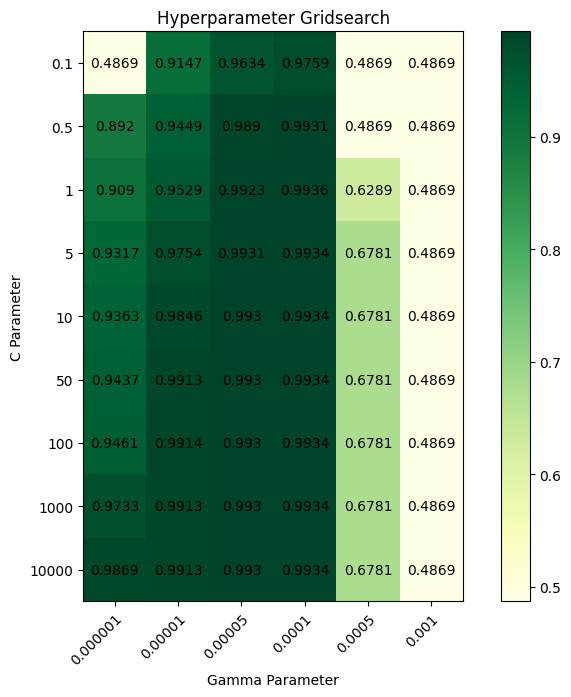

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
gamma = ["0.000001", "0.00001", "0.00005", "0.0001", "0.0005", "0.001"]
c = ["0.1", "0.5", "1", "5", "10", "50", "100", "1000", "10000"]
around_record = np.around(record, decimals=4) #先把record四捨五入

fig, ax = plt.subplots()
im = ax.imshow(around_record, cmap="YlGn")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma)), labels=gamma)
ax.set_yticks(np.arange(len(c)), labels=c)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(gamma)):
    for j in range(len(c)):
        text = ax.text(i, j, around_record[j, i], ha="center", va="center")

ax.set_title("Hyperparameter Gridsearch")
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
fig.tight_layout()
fig.set_size_inches(8, 8)
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [28]:
best_model = SVC(C=1, kernel='rbf', gamma=0.0001)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
#print("Accuracy score: ", accuracy_score(y_pred, y_test))